# Assignment No 7

You work in XYZ Company as a Python. The company officials want you to build a data science model.
1. Using sklearn import the wine dataset
2. Split the data into train and test set
3. Train the model
4. Make Predictions
5. Check the performance of the model using r2_score

In [1]:
import numpy as pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("wine.csv")

In [3]:
df.head(4)

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480


In [4]:
df.shape

(178, 14)

In [5]:
df.isnull().sum()

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [7]:
#Checking and removing outliers
col_list=df.columns

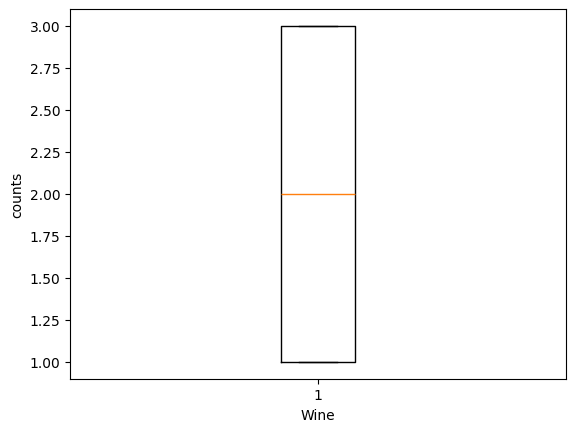

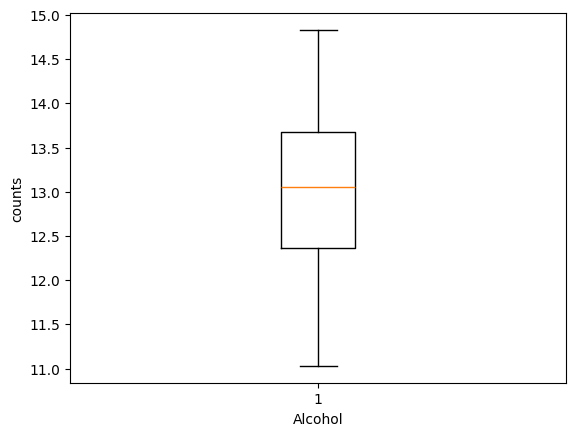

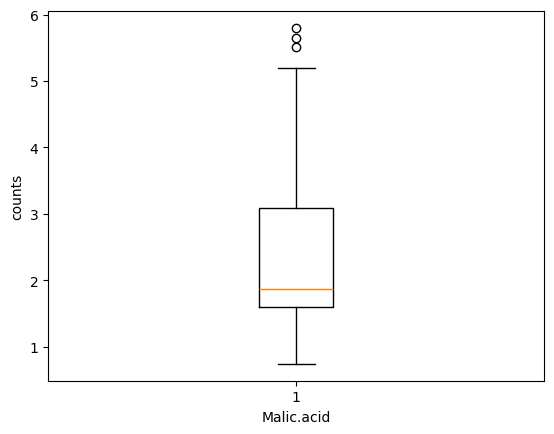

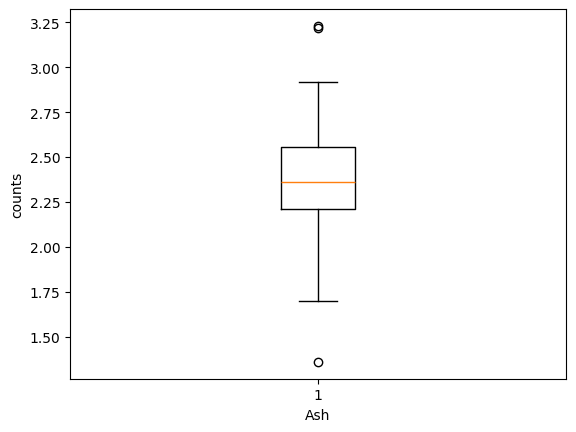

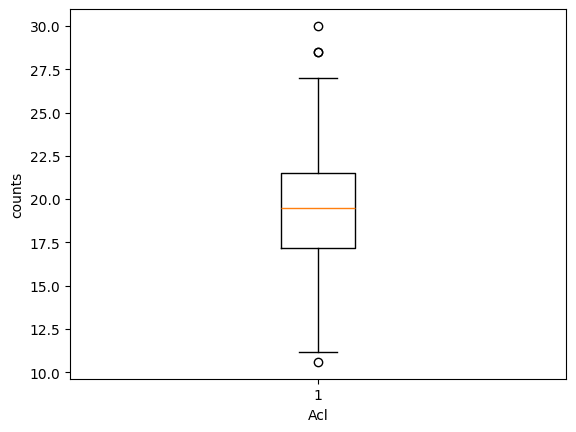

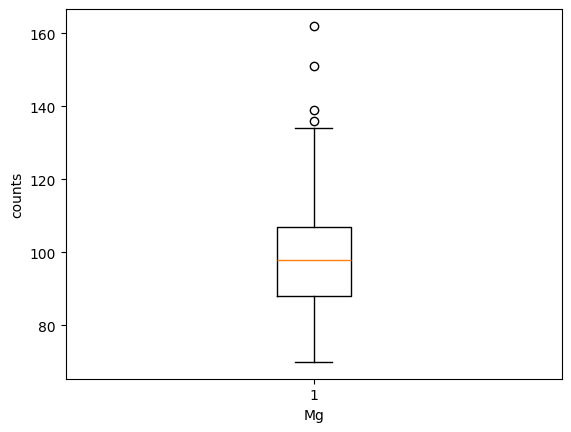

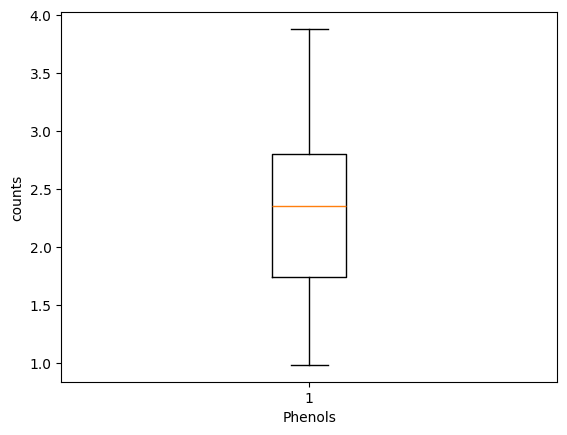

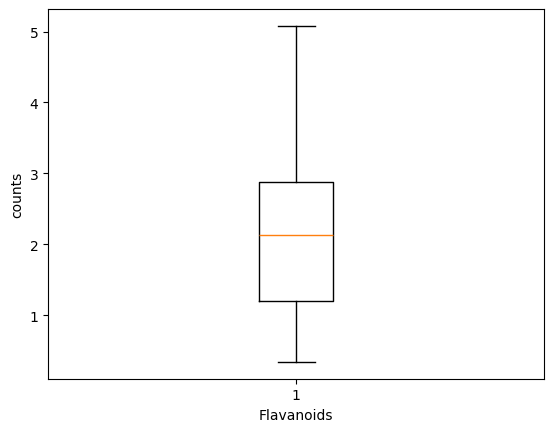

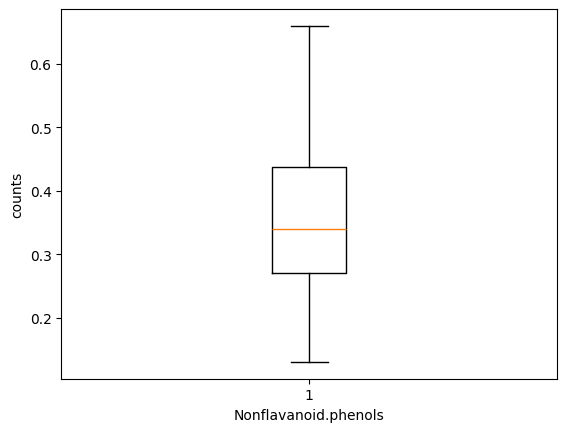

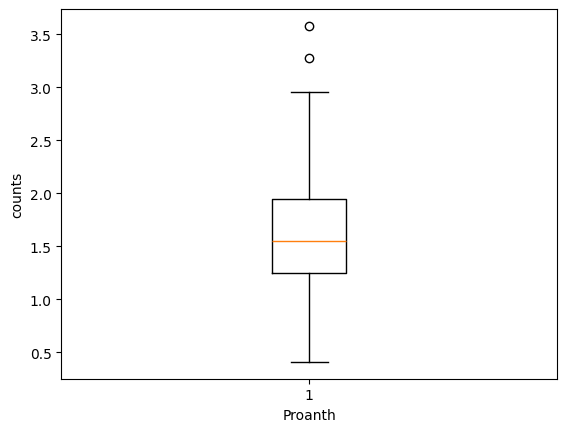

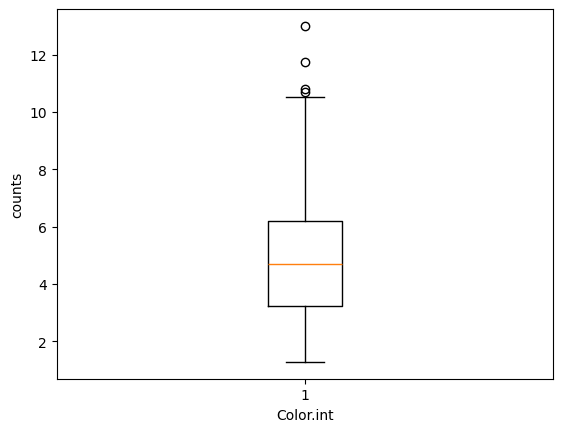

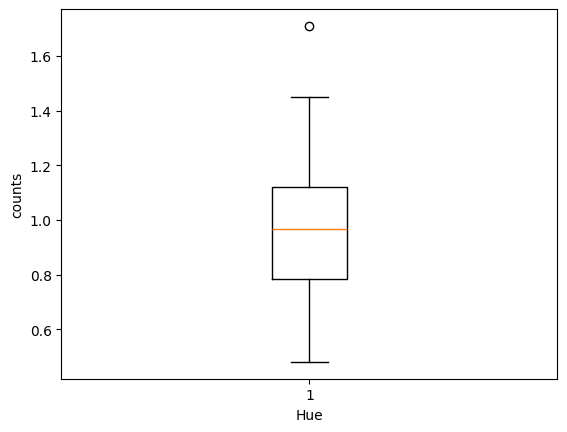

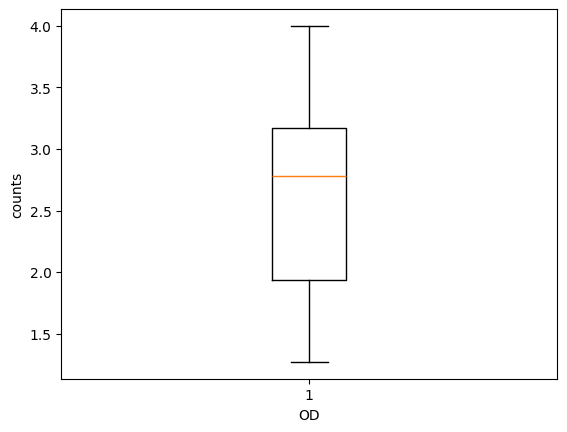

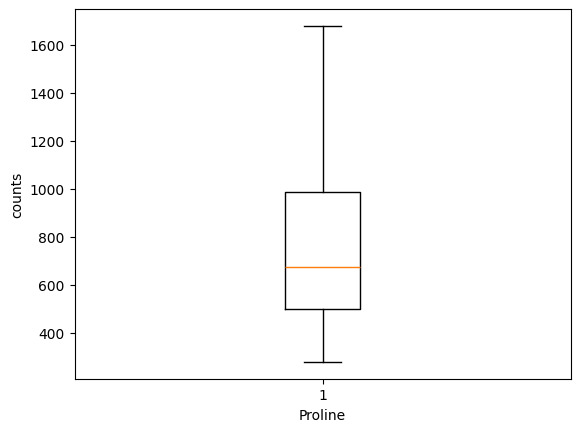

In [9]:
for i in col_list:
    if((df[i].dtypes=="int64") or (df[i].dtypes=="float64")):
        plt.boxplot(df[i])
        plt.xlabel(i)
        plt.ylabel("counts")
        plt.show()

In [10]:
col_list

Index(['Wine', 'Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue',
       'OD', 'Proline'],
      dtype='object')

In [11]:
outlist=[ 'Malic.acid', 'Ash', 'Acl', 'Mg',
        'Proanth', 'Color.int', 'Hue']

In [12]:
for i in outlist:
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1
    df=df[(df[i]>=Q1-1.5*IQR) & (df[i]<=Q3+1.5*IQR)]

In [14]:
df.duplicated().sum()

0

In [15]:
# Performing VIF

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [17]:
cols_list=[]

In [19]:
for i in col_list:
    if ((df[i].dtypes!="object") & (i!="Proline")):
        cols_list.append(i)

In [20]:
x=df[cols_list]

In [21]:
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["VIF"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,features,VIF
0,Wine,34.515700
1,Alcohol,289.171582
2,Malic.acid,10.234246
3,Ash,179.587023
4,Acl,97.227063
5,Mg,104.115311
6,Phenols,73.847723
7,Flavanoids,67.721360
8,Nonflavanoid.phenols,16.817084
9,Proanth,24.277992


In [22]:
df=df.drop(["Mg"], axis=1)

In [24]:
cols_list=[]
for i in df.columns:
     if ((df[i].dtypes!="object") & (i!="Proline")):
        cols_list.append(i)
x=df[cols_list]
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["VIF"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,features,VIF
0,Wine,34.507189
1,Alcohol,245.631651
2,Malic.acid,10.228792
3,Ash,147.632329
4,Acl,96.162177
5,Phenols,73.398894
6,Flavanoids,67.545935
7,Nonflavanoid.phenols,15.925802
8,Proanth,24.241299
9,Color.int,17.055296


In [26]:
df=df.drop(["Alcohol"],axis=1)

In [27]:
cols_list=[]
for i in df.columns:
     if ((df[i].dtypes!="object") & (i!="Proline")):
        cols_list.append(i)
x=df[cols_list]
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["VIF"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,features,VIF
0,Wine,30.757879
1,Malic.acid,9.656276
2,Ash,129.593173
3,Acl,96.084099
4,Phenols,73.397844
5,Flavanoids,66.329078
6,Nonflavanoid.phenols,15.559089
7,Proanth,24.150585
8,Color.int,11.266083
9,Hue,40.598416


In [28]:
df=df.drop(["Ash"],axis=1)

In [29]:
cols_list=[]
for i in df.columns:
     if ((df[i].dtypes!="object") & (i!="Proline")):
        cols_list.append(i)
x=df[cols_list]
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["VIF"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,features,VIF
0,Wine,30.449777
1,Malic.acid,9.067566
2,Acl,64.575625
3,Phenols,71.682360
4,Flavanoids,66.234800
5,Nonflavanoid.phenols,15.047071
6,Proanth,23.990154
7,Color.int,9.245273
8,Hue,37.210404
9,OD,46.210318


In [30]:
df=df.drop(["Phenols"], axis=1)

In [31]:
cols_list=[]
for i in df.columns:
     if ((df[i].dtypes!="object") & (i!="Proline")):
        cols_list.append(i)
x=df[cols_list]
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["VIF"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,features,VIF
0,Wine,28.903886
1,Malic.acid,9.061594
2,Acl,64.487204
3,Flavanoids,38.338553
4,Nonflavanoid.phenols,14.744841
5,Proanth,23.721959
6,Color.int,8.645592
7,Hue,37.208574
8,OD,42.814196


In [32]:
df=df.drop(["Acl"], axis=1)

In [33]:
cols_list=[]
for i in df.columns:
     if ((df[i].dtypes!="object") & (i!="Proline")):
        cols_list.append(i)
x=df[cols_list]
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["VIF"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,features,VIF
0,Wine,16.773488
1,Malic.acid,8.790061
2,Flavanoids,38.077841
3,Nonflavanoid.phenols,14.249592
4,Proanth,23.660314
5,Color.int,8.642281
6,Hue,35.771054
7,OD,39.545302


In [34]:
df=df.drop(["OD"], axis=1)

In [35]:
cols_list=[]
for i in df.columns:
     if ((df[i].dtypes!="object") & (i!="Proline")):
        cols_list.append(i)
x=df[cols_list]
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["VIF"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,features,VIF
0,Wine,16.451704
1,Malic.acid,8.209132
2,Flavanoids,29.977025
3,Nonflavanoid.phenols,14.228145
4,Proanth,23.218391
5,Color.int,8.054947
6,Hue,30.760479


In [36]:
df=df.drop(["Hue"], axis=1)

In [37]:
cols_list=[]
for i in df.columns:
     if ((df[i].dtypes!="object") & (i!="Proline")):
        cols_list.append(i)
x=df[cols_list]
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["VIF"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,features,VIF
0,Wine,13.042159
1,Malic.acid,7.925211
2,Flavanoids,15.522984
3,Nonflavanoid.phenols,11.335129
4,Proanth,23.202082
5,Color.int,7.327662


In [38]:
df=df.drop(["Proanth"], axis=1)

In [39]:
cols_list=[]
for i in df.columns:
     if ((df[i].dtypes!="object") & (i!="Proline")):
        cols_list.append(i)
x=df[cols_list]
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["VIF"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,features,VIF
0,Wine,12.307044
1,Malic.acid,7.791637
2,Flavanoids,3.317210
3,Nonflavanoid.phenols,11.319299
4,Color.int,7.290724


In [40]:
df=df.drop(["Wine"], axis=1)

In [41]:
cols_list=[]
for i in df.columns:
     if ((df[i].dtypes!="object") & (i!="Proline")):
        cols_list.append(i)
x=df[cols_list]
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["VIF"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,features,VIF
0,Malic.acid,6.689598
1,Flavanoids,2.913428
2,Nonflavanoid.phenols,6.854011
3,Color.int,6.631612


In [42]:
df=df.drop(["Nonflavanoid.phenols"], axis=1)

In [43]:
cols_list=[]
for i in df.columns:
     if ((df[i].dtypes!="object") & (i!="Proline")):
        cols_list.append(i)
x=df[cols_list]
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["VIF"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,features,VIF
0,Malic.acid,4.743419
1,Flavanoids,2.797034
2,Color.int,5.980157


In [44]:
y=df.iloc[:,-1]
y

0      1065
1      1050
2      1185
3      1480
4       735
       ... 
172     660
174     750
175     835
176     840
177     560
Name: Proline, Length: 161, dtype: int64

In [45]:
#Training the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [46]:
x_train,x_test, y_train, y_test= train_test_split(x,y, test_size=0.2)

In [47]:
lr=LinearRegression()

In [48]:
lr.fit(x_train,y_train)

LinearRegression()

In [49]:
y_pred=lr.predict(x_test)

In [50]:
#Checking the accuracy of the model using r2 score

In [51]:
from sklearn.metrics import r2_score

In [54]:
r2score=r2_score(y_test, y_pred)

In [55]:
r2score

0.5003473510436978